In [2]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()

# You can then get the filename from the uploaded dictionary
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}"')
  file_name = fn

In [8]:
import pandas as pd
#loading csv files
biometric_files=['api_data_aadhar_biometric_0_500000.csv','api_data_aadhar_biometric_500000_1000000.csv',
                 'api_data_aadhar_biometric_1000000_1500000.csv','api_data_aadhar_biometric_1500000_1861108.csv']

#merging the individual files using pd.concat() fucntion
df_biometric=pd.concat([pd.read_csv(file) for file in biometric_files],ignore_index=True)

#verifying the merge
df_biometric.head()
print(f"Total number of rows : {len(df_biometric)}")
print(type(df_biometric))




Total number of rows : 1861108
<class 'pandas.core.frame.DataFrame'>


In [4]:
df_biometric.info()
df_biometric.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


,date,state,district,pincode,bio_age_5_17,bio_age_17_
939641,04-11-2025,Maharashtra,Hingoli,431512,26,72
376375,13-09-2025,Rajasthan,Jodhpur,342306,180,46
1267681,18-11-2025,Madhya Pradesh,Alirajpur,457993,1,0
1856043,29-12-2025,Uttar Pradesh,Rae Bareli,229307,14,4
144279,02-09-2025,Telangana,Nalgonda,508213,11,20
1036547,08-11-2025,Chhattisgarh,Korba,495671,3,25
1394499,04-12-2025,Haryana,Fatehabad,125048,9,16
1821369,28-12-2025,Telangana,Nizamabad,503114,5,3
1699489,18-12-2025,Karnataka,Mandya,571435,1,1
989373,06-11-2025,Tamil Nadu,Viluppuram,607107,2,3


In [5]:
#1.DATA CLEANING STATES
#toavoid data anamoly like 'ktka' and 'KTKA' convert every state to uppercase and remove trailing or leading white spaces
df_biometric['state'] = df_biometric['state'].str.strip().str.upper()
df_biometric['district'] = df_biometric['district'].str.strip().str.upper()


#mapping each state to its correct spelling
state_correction = {
    'ORISSA': 'ODISHA',
    'PONDICHERRY': 'PUDUCHERRY',
    'UTTARANCHAL': 'UTTARAKHAND', #uttaranchal replaced to utk
    'TELANGANA STATE': 'TELANGANA',

    #d&n haveli and d&d was merged into a ut in 2020
    'D&N HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DAMAN & DIU': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DADRA AND NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DAMAN AND DIU': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DADRA & NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',


    'A & N ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS',
    'A AND N ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS',
    'ANDAMAN & NICOBAR': 'ANDAMAN AND NICOBAR ISLANDS',
    'CHANDIGARG': 'CHANDIGARH',
    'DELHI NCR': 'DELHI',
    'NCT OF DELHI': 'DELHI',
    'J & K': 'JAMMU AND KASHMIR',
    'JAMMU & KASHMIR': 'JAMMU AND KASHMIR',
    'UP': 'UTTAR PRADESH',
    'MP': 'MADHYA PRADESH',
    'TN': 'TAMIL NADU',
    'WB': 'WEST BENGAL'
}

# Applying the mapping
df_biometric['state'] = df_biometric['state'].replace(state_correction)

official_states_uts = [
    # 28 States
    'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH',
    'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA',
    'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
    'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
    'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
    # 8 Union Territories
    'ANDAMAN AND NICOBAR ISLANDS', 'CHANDIGARH', 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DELHI', 'JAMMU AND KASHMIR', 'LADAKH', 'LAKSHADWEEP', 'PUDUCHERRY'
]

#Keeping valid rows
df_biometric = df_biometric[df_biometric['state'].isin(official_states_uts)]
print(f"Unique states found : {df_biometric['state'].nunique()}") #(36 = 28+8)

Unique states found : 36


In [6]:
#2. DATA CLEANING PINCODE
##1_  Pincodes have to converted to string because when originally in float, the leading 0's in some pincodes can be removed, which cause data anamoly.
#leading 0's in pincodes indicates regions in the north and north east india
##2_  If not converted to float 563400 becomes 563400.00 (563400 != 563400.00) which is exceeds the required number of digits for a pincode(6)

df_biometric['pincode'] = df_biometric['pincode'].astype(str).str.replace('.0','',regex=False)

#ensures all pincodes are exactly 6 digits
df_biometric = df_biometric['pincode'].str.zfill(6)

In [9]:
#3.DATA CLEANING BIOMETRIC AGE
#1_ if the biometric ages of groups (5-17) & (17+) in a particular district is 0, this indicates an inactive region/ dark zone and hence
#creating a column 'active_status' and assigning active or inactive to regions based on conditions
# Check type first - if this says 'Series', you MUST re-run your concat cell


df_biometric.columns = [str(col).strip() for col in df_biometric.columns]
df_biometric['active_status'] = 'Active'

df_biometric.loc[(df_biometric['bio_age_5_17'] == 0) & (df_biometric['bio_age_17_'] == 0), 'active_status'] = 'Inactive'

print(df_biometric['active_status'].value_counts())


# Converting count columns to numeric, turning errors (like text or 'NA') into 0
df_biometric['bio_age_5_17'] = pd.to_numeric(df_biometric['bio_age_5_17'], errors='coerce').fillna(0).astype(int)
df_biometric['bio_age_17_'] = pd.to_numeric(df_biometric['bio_age_17_'], errors='coerce').fillna(0).astype(int)


active_status
Active      1861096
Inactive         12
Name: count, dtype: int64


In [10]:
#4. DATA CLEANING -  Unrealistic Data
# Suppose a situation where the biometric update data of a pincode(district) shows more than the entire population of that district - this is statistically impossible
#and hence considered as 'Unrealistic data'.
# When the biometric update is lesser than a limit then it indicates that the region is under-served or has lack of infrastructure and other facilities.
# My approach is to create an upper and lower limit respectively using IQR(INTERQUARTILE RANGE)
for col in ['bio_age_5_17','bio_age_17_'] :
  Q1 = df_biometric[col].quantile(0.25)
  Q3  = df_biometric[col].quantile(0.75)
  IQR = Q3-Q1

  upper_limit = Q3 + (3*IQR)
  lower_limit = Q1 -(3*IQR)

  #upper_limit condition
  df_biometric[f"{col}_upper_anomaly"] = df_biometric[col]>upper_limit

  #lower limit condition
  #using max to avoid negative lower limits and set it as 0 if negative
  df_biometric[f"{col}_lower_anomaly"] = df_biometric[col]<max(0,lower_limit)

  #Creating a Master Flag for any anomaly in the row
df_biometric['has_any_anomaly'] = (
    df_biometric['bio_age_5_17_upper_anomaly'] |
    df_biometric['bio_age_5_17_lower_anomaly'] |
    df_biometric['bio_age_17__upper_anomaly'] |
    df_biometric['bio_age_17__lower_anomaly']
)

# Summary Output
print("--- Anomaly Detection Report ---")
for col in ['bio_age_5_17','bio_age_17_']:
    u_count = df_biometric[f'{col}_upper_anomaly'].sum()
    l_count = df_biometric[f'{col}_lower_anomaly'].sum()
    print(f"{col}: Found {u_count} Upper and {l_count} Lower anomalies.")

--- Anomaly Detection Report ---
bio_age_5_17: Found 133599 Upper and 0 Lower anomalies.
bio_age_17_: Found 141332 Upper and 0 Lower anomalies.


The above results indicates that in India the biometric updates of *age group 5-17 & 17+* is being **handled by a single center** of a huge megacity like Delhi,Mumbai,Bengaluru when compared with multiple rural aadhar centers. (*upper anamoly spiking at 13,3599*)    


---


In India, the age groups 5-17 th UIDAI **mandates** biometric updates (photo, fingerprints, iris)

High upper anomaly for this age group(5-17) indicates that specific megacities are conducting massive  '*Update Camps'*  for  Schools.


---


Whereas for age groups 17 and above the UIDAI prescribes voluntary updates.
Hence the high upper anomaly comapred to the former age group indicates that most of the adults in a region travel to megacities for successfull biometric update.




---
Whereas the **lower anomaly** residing at 0 indicates that the the aadhar update centers in India of various states are under-served and have insufficient infrastructure to conduct daily biometric updates.                              As the lower anamoly has come to 0 this showcases that the rural updates are so consistently low that it has reached a negative number and hence initialized to *0* using the below formulas :

```
lower_limit = Q1 -(3*IQR)
df_biometric[f"{col}_lower_anomaly"] = df_biometric[col]<max(0,lower_limit)  
```
This indicates under-performance of the aadhar update centers in these regions.



In [11]:
#Grouped by State and calculated the mean (which gives the percentage for True/False flags)
state_analysis = df_biometric.groupby('state').agg({
    'bio_age_5_17_upper_anomaly': 'mean',
    'bio_age_17__upper_anomaly': 'mean',
    'has_any_anomaly': 'mean'
})

#Converting to percentages
state_analysis = state_analysis * 100

#Sorted by the highest overall anomaly rate
state_analysis = state_analysis.sort_values(by='has_any_anomaly', ascending=False)

#Displayed the Top 10 States with the most anomalies
print("--- Top 10 States by Anomaly Percentage ---")
print(state_analysis.head(10).round(2))

--- Top 10 States by Anomaly Percentage ---
                        bio_age_5_17_upper_anomaly  bio_age_17__upper_anomaly  \
state                                                                           
Chhattisgarh                                 16.34                      21.27   
Delhi                                        18.44                      22.82   
Dadra and Nagar Haveli                       12.92                      19.69   
Maharashtra                                  10.94                      16.52   
Madhya Pradesh                               11.11                      12.52   
Uttar Pradesh                                14.15                       8.12   
Haryana                                      11.47                      13.08   
Rajasthan                                    12.39                       8.93   
Manipur                                      12.37                       9.28   
Bihar                                         7.08               

The above results indicate that the biometric updates is **not uniform** across India. It is concentrated in specific regions/states.





1.  **STATES -**


*   DELHI
*   CHHATTISGARH
*   MAHARASHTRA

**PATTERN SEEN -**
*Adult Surge* wherein the biometric updates of age group 17 & above is greater than the age group of 5 to 17.

This indicates that more number of adults are updating their biometrics in these regions due to reasons like below :


*   Mandatory KYC (Know your Customer) for banks
*   Shifiting to these citites for better job oppurtunities




---



2.   **STATES -**


*   Uttar Pradesh
*   Manipur
*   Rajasthan

**PATTERN SEEN  -**  The child biometric updates of age groups 5 to 17 are much higher than the bioemtric updates of age group 17 & above.

This indicates these states they have achieved **policy success** wherein *mandatory biometric camps (MBC)* are being conducted by UIDAI in various educational institutions.

---

3.  **STATES -**


*  HARYANA
*  MADHYA PRADESH

**PATTERN SEEN - ** These states have nearly same but  minute differences in the biometric updates of both the age groups.

This indicates that these states have even distribution of insfrastructure for  bioemtric updates across the age groups with more stability.

---

4. **STATES -**
*   BIHAR

**PATTERN SEEN -** In the state of Bihar, there is a huge difference of the bioemtric updates of both the age groups wherein the mandatory bioemtric updates of the age group 5 to 17 is much lower than the bioemtric updates of the group 17 & above.

This indicates that the infrastructure for bioemtric updates is fragmented or under served. It has numerous aadhar update centers which showcase 0 activity and are potentially slow centers.














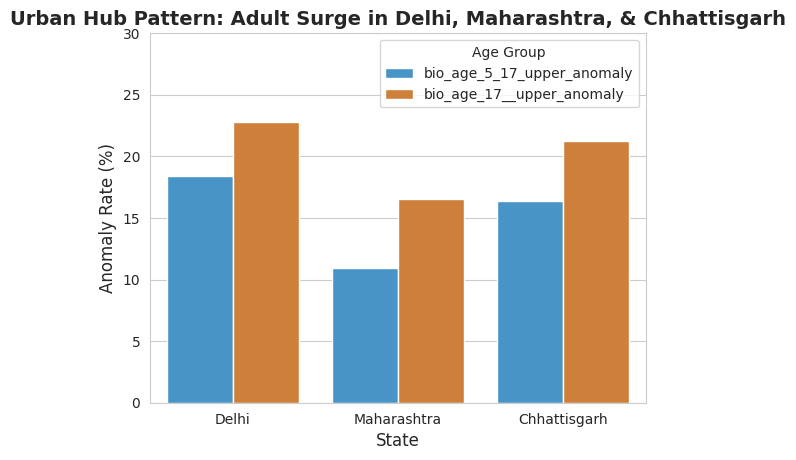

In [16]:
#Analysis of each category through visualization
#grouped bar plot - delhi, maharashtra, chhattisgarh
import matplotlib.pyplot as plt
import seaborn as sns
target_states = ['Delhi', 'Maharashtra', 'Chhattisgarh']
df_target = state_analysis.loc[target_states]

df_plot = df_target.reset_index()

# plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
#seabron require long data to visualize the hue color parameter efficiently
df_melted = df_plot.melt(id_vars='state',
                         value_vars=['bio_age_5_17_upper_anomaly', 'bio_age_17__upper_anomaly'],
                         var_name='Age Group', value_name='Anomaly Percentage')

sns.barplot(data=df_melted, x='state', y='Anomaly Percentage', hue='Age Group', palette=['#3498db', '#e67e22'])
plt.title('Urban Hub Pattern: Adult Surge in Delhi, Maharashtra, & Chhattisgarh', fontsize=14, fontweight='bold')
plt.ylabel('Anomaly Rate (%)', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.ylim(0, 30) # Setting limit slightly above max value (26.25) for clarity

plt.show()

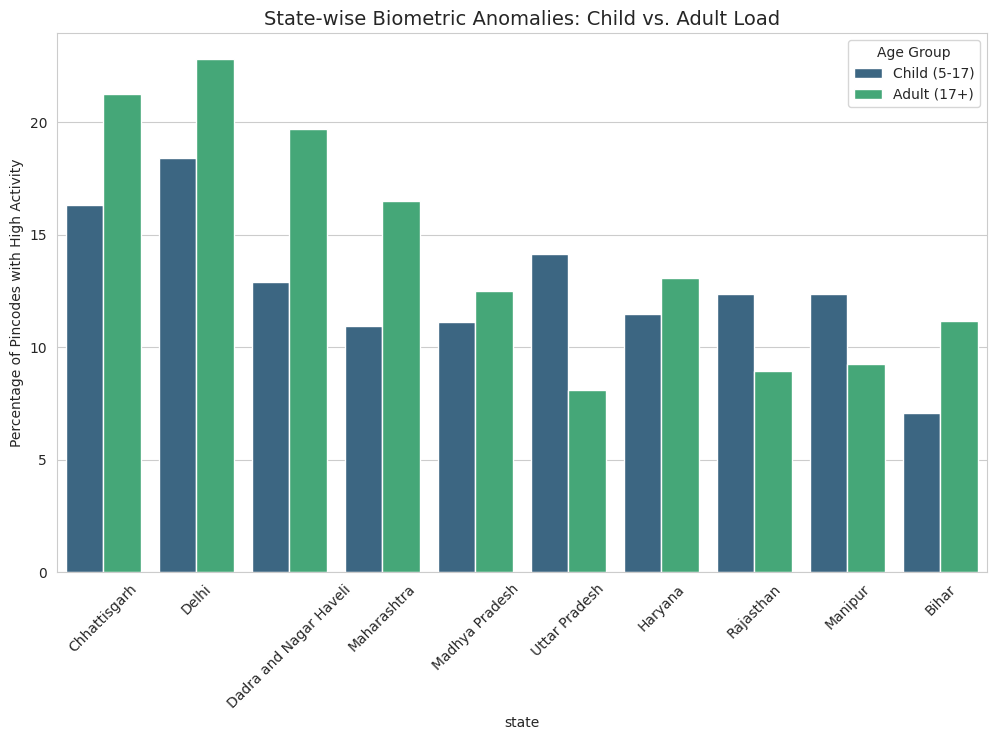

In [20]:
#STATES -Uttar Pradesh Manipur Rajasthan
#clustered bar graph
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index so 'state' becomes a column for plotting
df_plot = state_analysis.head(10).reset_index()

# "Melt" the data to a long format for Seaborn
df_long = df_plot.melt(id_vars='state',
                       value_vars=['bio_age_5_17_upper_anomaly', 'bio_age_17__upper_anomaly'],
                       var_name='Age Group', value_name='Anomaly %')

# Set labels for better readability
df_long['Age Group'] = df_long['Age Group'].replace({
    'bio_age_5_17_upper_anomaly': 'Child (5-17)',
    'bio_age_17__upper_anomaly': 'Adult (17+)'
})

plt.figure(figsize=(12, 7))
sns.barplot(data=df_long, x='state', y='Anomaly %', hue='Age Group', palette='viridis')

plt.title('State-wise Biometric Anomalies: Child vs. Adult Load', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Percentage of Pincodes with High Activity')
plt.show()

/tmp/ipython-input-1677280855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_df, x='state', y='bio_age_17_', palette="Set2")


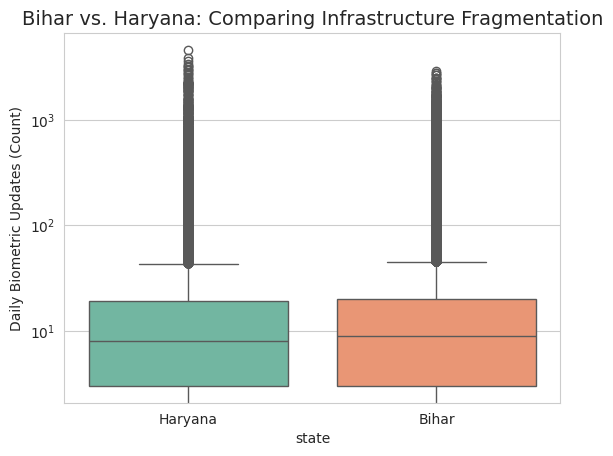

In [25]:
#boxplot
#Filtered the  data for two specific states to show contrast
comparison_df = df_biometric[df_biometric['state'].isin(['Bihar', 'Haryana'])]
sns.boxplot(data=comparison_df, x='state', y='bio_age_17_', palette="Set2")
plt.title("Bihar vs. Haryana: Comparing Infrastructure Fragmentation", fontsize=14)
plt.ylabel("Daily Biometric Updates (Count)")
plt.yscale('log') #Log scale helps see the distribution near zero
plt.show()